<a href="https://colab.research.google.com/github/Arju-Jawla/WIND-WAVE/blob/main/WIND_WAVE_02_IMPROVED_VISUALS_OF_LOCATIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Required Libraries

In [ ]:
!pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.0
    Uninstalling pyproj-3.7.0:
      Successfully uninstalled pyproj-3.7.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [ ]:
import folium

## 2. Port Locations

In [ ]:
# List of ports along with their adjusted coordinates
ports = {
    'Visakhapatnam': (17.6, 83.4),
    'Chennai': (13.0, 80.5),
    'Paradeep': (20.2, 86.8),
    'Kakinada': (16.8, 82.4),
    'Mumbai': (18.8, 72.7),
    'Kochi': (9.8, 76.1),
    'Mangalore': (13, 74.6),
    'Kandla': (22.6, 69.6),
    'Tuticorin': (8.7, 78.3),
    'Port Blair': (11.5, 92.8),
}

## 3. Visualizations on India map with grids

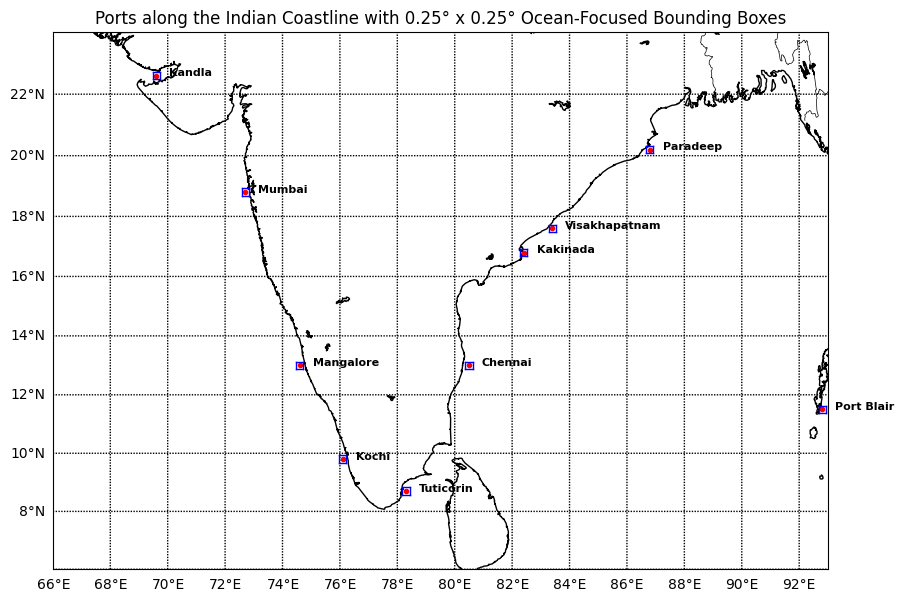

In [ ]:
# Set up the map with Basemap
plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', llcrnrlat=6, urcrnrlat=24, llcrnrlon=66, urcrnrlon=93, resolution='i')

m.drawcoastlines()
m.drawcountries()
m.drawparallels(range(6, 24, 2), labels=[1, 0, 0, 0])
m.drawmeridians(range(66, 93, 2), labels=[0, 0, 0, 1])

# Plot ports and their bounding boxes
for port, (lat, lon) in ports.items():
    x, y = m(lon, lat)  # Convert lat/lon to map projection
    m.plot(x, y, marker='o', color='red', markersize=3)  # Plot port location

    # Annotate port name near the point
    plt.text(x + 50000, y, port, fontsize=8, color='black', weight='bold')  # Adjust offset for better visibility

    # Convert corners of the 0.25° x 0.25° box to map projection
    lon_min, lon_max = lon - 0.125, lon + 0.125
    lat_min, lat_max = lat - 0.125, lat + 0.125
    x_min, y_min = m(lon_min, lat_min)
    x_max, y_max = m(lon_max, lat_max)

    # Draw 0.5° x 0.5° box
    m.plot([x_min, x_max], [y_min, y_min], color='blue', linewidth=1)  # Bottom edge
    m.plot([x_min, x_max], [y_max, y_max], color='blue', linewidth=1)  # Top edge
    m.plot([x_min, x_min], [y_min, y_max], color='blue', linewidth=1)  # Left edge
    m.plot([x_max, x_max], [y_min, y_max], color='blue', linewidth=1)  # Right edge

# Display the map
plt.title('Ports along the Indian Coastline with 0.25° x 0.25° Ocean-Focused Bounding Boxes')
plt.savefig('ports_map.png')
plt.show()


### 3.1 Visualizations on live map

In [ ]:
# Initialize a folium map
m = folium.Map(location=[15, 80], zoom_start=5)

# Add ports and their bounding boxes
for port, (lat, lon) in ports.items():
    # Add a marker for the port
    folium.Marker(location=[lat, lon], popup=port, tooltip=port).add_to(m)

    # Create a bounding box (0.25° x 0.25°)
    lat_min, lat_max = lat - 0.125, lat + 0.125
    lon_min, lon_max = lon - 0.125, lon + 0.125

    # Draw the rectangle for the bounding box
    folium.Rectangle(
        bounds=[[lat_min, lon_min], [lat_max, lon_max]],
        color='blue',
        fill=True,
        fill_opacity=0.1
    ).add_to(m)

# Save the map to an HTML file
m.save("ports_map.html")

# Display the map (in a Jupyter environment)
m